# 5. Locally weighted linear regression

(a) 노트 참고

(b)

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel

In [3]:
x_train, y_train = util.load_dataset('data/ds5_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds5_valid.csv', add_intercept=True)
x_test, y_test = util.load_dataset('data/ds5_test.csv', add_intercept=True)

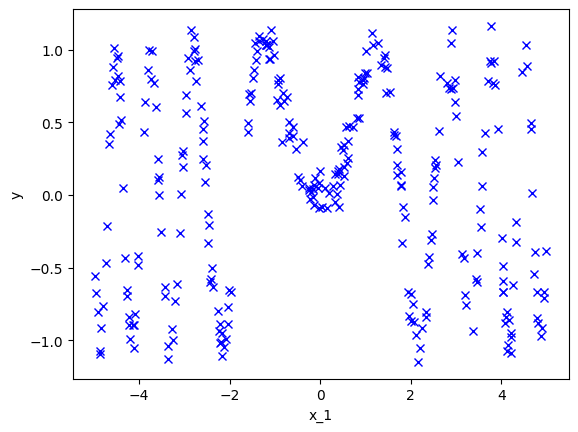

In [4]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.plot(x_train[:,-1], y_train, 'bx', linewidth=2)

In [5]:
class LocallyWeightedLinearRegression(LinearModel):

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):

        self.x = x
        self.y = y

    def predict(self, x):
        # 입력 데이터의 샘플 수와 피처 수를 구함
        l, n = x.shape
    
        # 입력 데이터 x를 추가 차원으로 변환하여 브로드캐스트 가능하도록 재구성
        # 이 과정을 통해 입력 데이터 x^(i)와 학습 데이터 self.x 사이의 거리(norm)를 계산
        w_vector = np.exp(- np.linalg.norm(self.x - np.reshape(x, (l, -1, n)), ord=2, axis=2)**2 / (2 * self.tau**2))
    
        # 계산된 가중치를 대각 행렬로 변환 (각 샘플마다 별도의 가중치 행렬 생성)
        w = np.apply_along_axis(np.diag, axis=1, arr=w_vector)
    
        # 각 입력 x^(i)에 대해 최적의 매개변수(theta) 계산
        # np.linalg.inv는 행렬의 역행렬을 계산
        theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y
    
        # 입력 데이터 x와 매개변수 theta를 사용해 예측값 계산
        # np.einsum은 아인슈타인 표기법을 사용해 x와 theta 간의 내적을 계산
        return np.einsum('ij,ij->i', x, theta)


tau = 0.5

In [6]:
clf = LocallyWeightedLinearRegression(tau=0.5)
clf.fit(x_train, y_train)

In [7]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

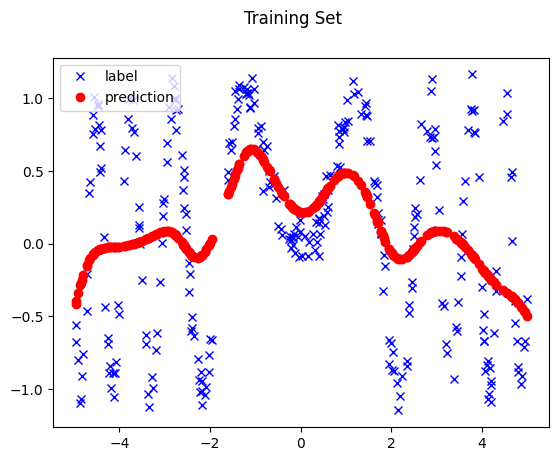

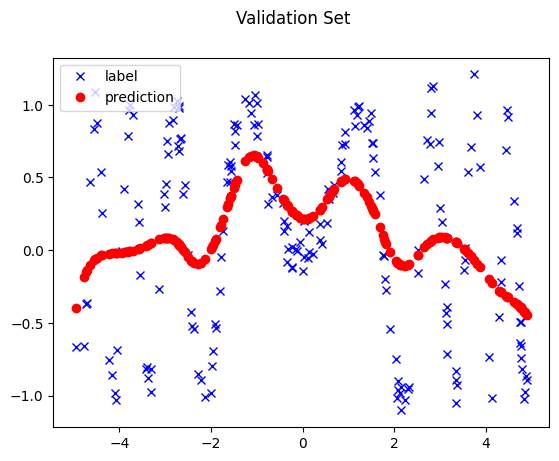

In [8]:
y_train_pred = clf.predict(x_train)
plot(x_train, y_train, y_train_pred, 'Training Set')

y_valid_pred = clf.predict(x_valid)
plot(x_valid, y_valid, y_valid_pred, 'Validation Set')

(c) 이후 과정은 진행하지 못했습니다